In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,
GradientBoostingClassifier
from sklearn.metrics import accuracy_score,
confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data Reading, Preprocessing, and Exploratory Analysis

In [ ]:
df=pd.read_csv("/content/Iris .csv")
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df['Species'].value_counts()

In [ ]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=4)

In [ ]:
class_labels = df['Species'].unique()
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
class_labels_encoded = encoder.transform(class_labels)

In [ ]:
df.corr()['Species']

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

[Text(0, 0, 'Iris-setosa'),
 Text(1, 0, 'Iris-versicolor'),
 Text(2, 0, 'Iris-virginica')]

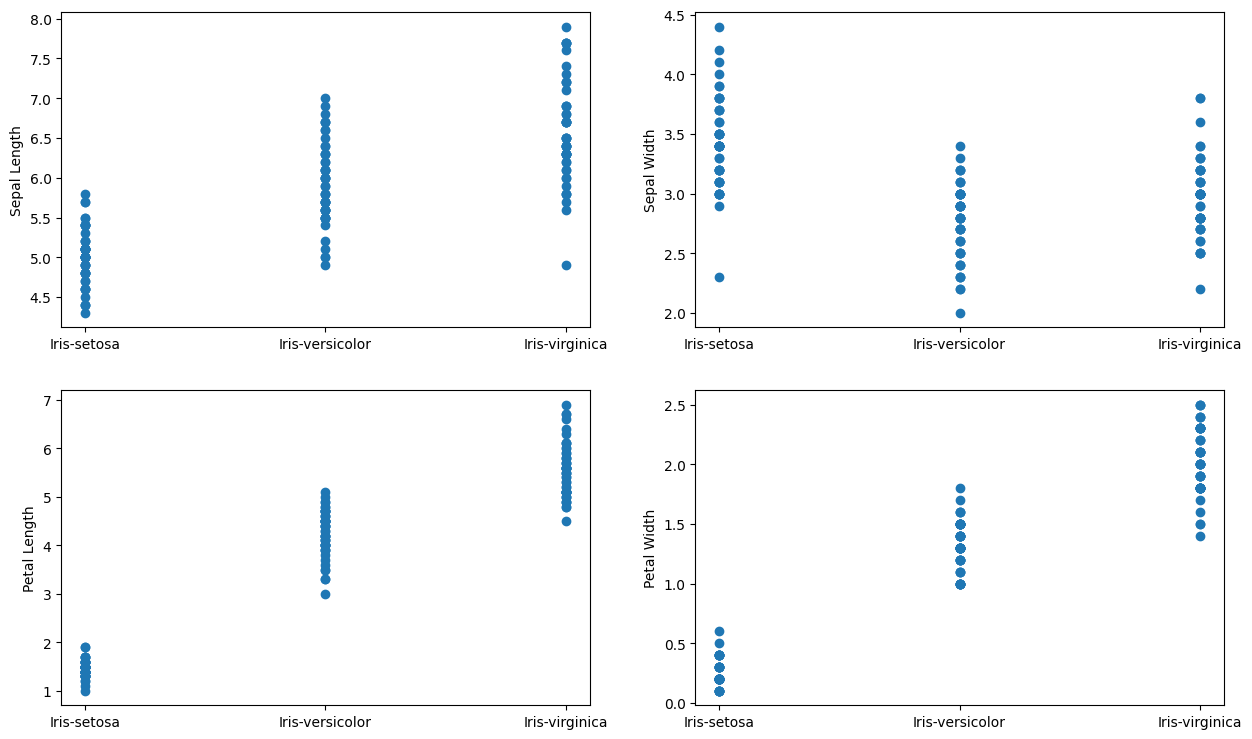

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,9))

ax1.scatter(x = df['Species'], y = df['SepalLengthCm'])
ax1.set_ylabel("Sepal Length")
ax1.set_xticks(class_labels_encoded)
ax1.set_xticklabels(class_labels)

ax2.scatter(x = df['Species'], y = df['SepalWidthCm'])
ax2.set_ylabel("Sepal Width")
ax2.set_xticks(class_labels_encoded)
ax2.set_xticklabels(class_labels)

ax3.scatter(x = df['Species'], y = df['PetalLengthCm'])
ax3.set_ylabel("Petal Length")
ax3.set_xticks(class_labels_encoded)
ax3.set_xticklabels(class_labels)

ax4.scatter(x = df['Species'], y = df['PetalWidthCm'])
ax4.set_ylabel("Petal Width")
ax4.set_xticks(class_labels_encoded)
ax4.set_xticklabels(class_labels)

In [ ]:
data_X = df.drop('Species', axis=1)
data_y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data Classification using Support Vector Machines

In [ ]:
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [ ]:
svm_y_pred = svm_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'kernel': ['linear', 'rbf','poly'],
                  'gamma' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

SVM best Params: {'C': 0.001, 'gamma': 10, 'kernel': 'poly'}
SVM best Score: 1.0


In [ ]:
svm_y_pred = svm_grid.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Data Classification using Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
rf_cv = KFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [1, 2],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [10, 50, 100]})

In [ ]:
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=8, max_features=2, max_samples=0.1,
                       n_estimators=10)
RF best Score: 1.0


In [ ]:
rf_y_pred = rf_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Data Classification using Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_y_pred = gb_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [2, 5, 8, 11], 'max_features': [1, 2],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [ ]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=2,
                           n_estimators=500)
GB best Score: 1.0


In [ ]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuray: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

